### Objective:  

- To implement a model to classify the given silhouette (Corgie dataset) as one of the 3 types of vehicles (bus, car, van).
- Apply dimensionality reduction using PCA and train the model using principal components.
- Compare performance of different models. 


In [1]:
# Importing necessary libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.decomposition import PCA

In [2]:
# Reading the dataset
df = pd.read_csv('vehicle.csv')
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

#### EXPLORATORY DATA ANALYSIS

In [3]:
# Shape of the data
print("Shape of Dataframe is :",df.shape)

Shape of Dataframe is : (846, 19)


In [4]:
# Data type of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

All attributes are numerical type.

In [5]:
# Converting the class attribute to Category
df['class'] = df['class'].astype('category')

In [6]:
# Check the presence of missing values
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
# Replacing "NaN" values with median values
df.fillna(df.median(),inplace=True)

<ipython-input-7-94633773bd8b>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(),inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    int64   
 1   circularity                  846 non-null    float64 
 2   distance_circularity         846 non-null    float64 
 3   radius_ratio                 846 non-null    float64 
 4   pr.axis_aspect_ratio         846 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    int64   
 6   scatter_ratio                846 non-null    float64 
 7   elongatedness                846 non-null    float64 
 8   pr.axis_rectangularity       846 non-null    float64 
 9   max.length_rectangularity    846 non-null    int64   
 10  scaled_variance              846 non-null    float64 
 11  scaled_variance.1            846 non-null    float64 
 12  scaled_radius_of_gyration    846 non-null    float64 
 13  scale

In [9]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

#### Univariate analysis:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

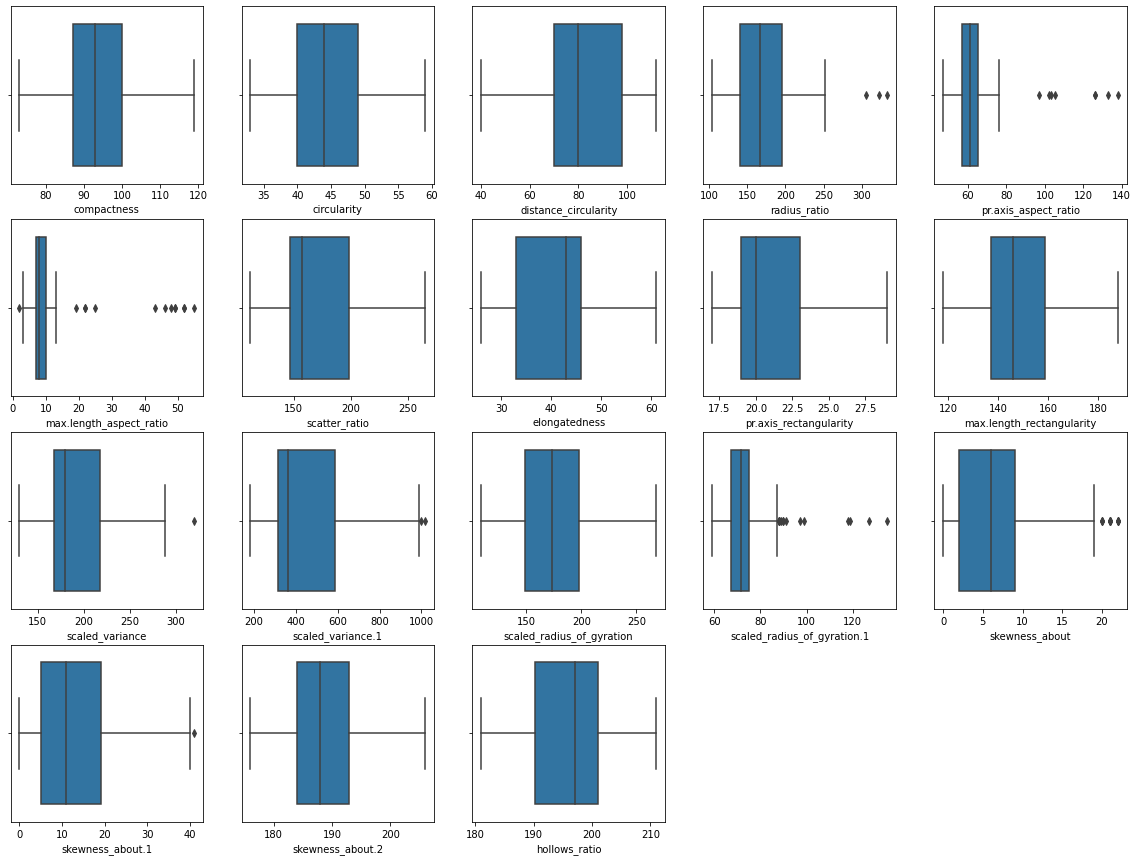

In [10]:
# Checking for Outliers using Box Plot
plt.figure(figsize=(20,15))
for i in range(0,18):
    plt.subplot(4,5,i+1)
    sns.boxplot(df[df.columns[i]])

Outliers observed for below attributes

- radius_ratio
- pr.axis_aspect_ratio
- max.length_aspect_ratio
- scaled_variance
- scaled_variance.1
- scaled_radius_of_gyration.1
- skewness_about
- skewness_about.1

In [11]:
# Replacing outliers with median
for k in range(0,18):
    q1 = df[df.columns[k]].quantile(0.25)
    q3 = df[df.columns[k]].quantile(0.75)
    iqr = q3-q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df.loc[(df[df.columns[k]] < low) | (df[df.columns[k]] > high),df.columns[k]] = df[df.columns[k]].median()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

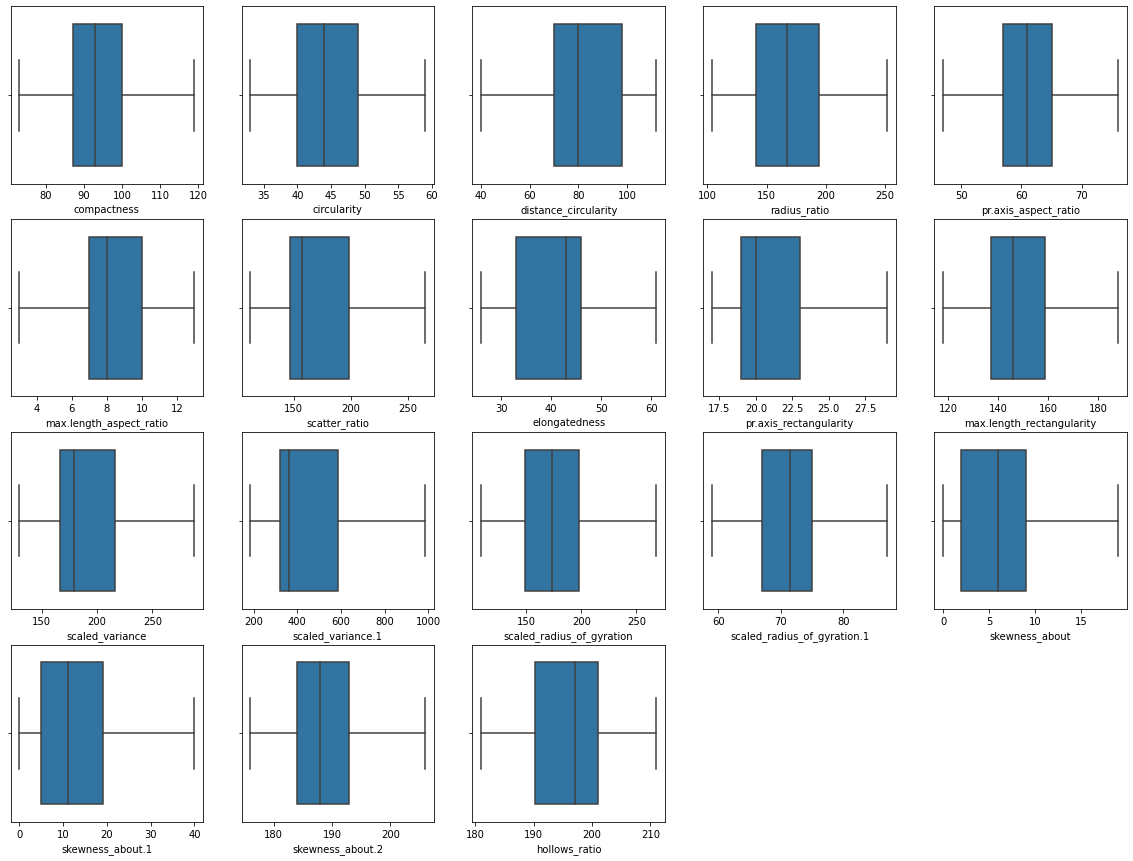

In [12]:
# Re-checking for Outliers using Box Plot
plt.figure(figsize=(20,15))
for i in range(0,18):
    plt.subplot(4,5,i+1)
    sns.boxplot(df[df.columns[i]])

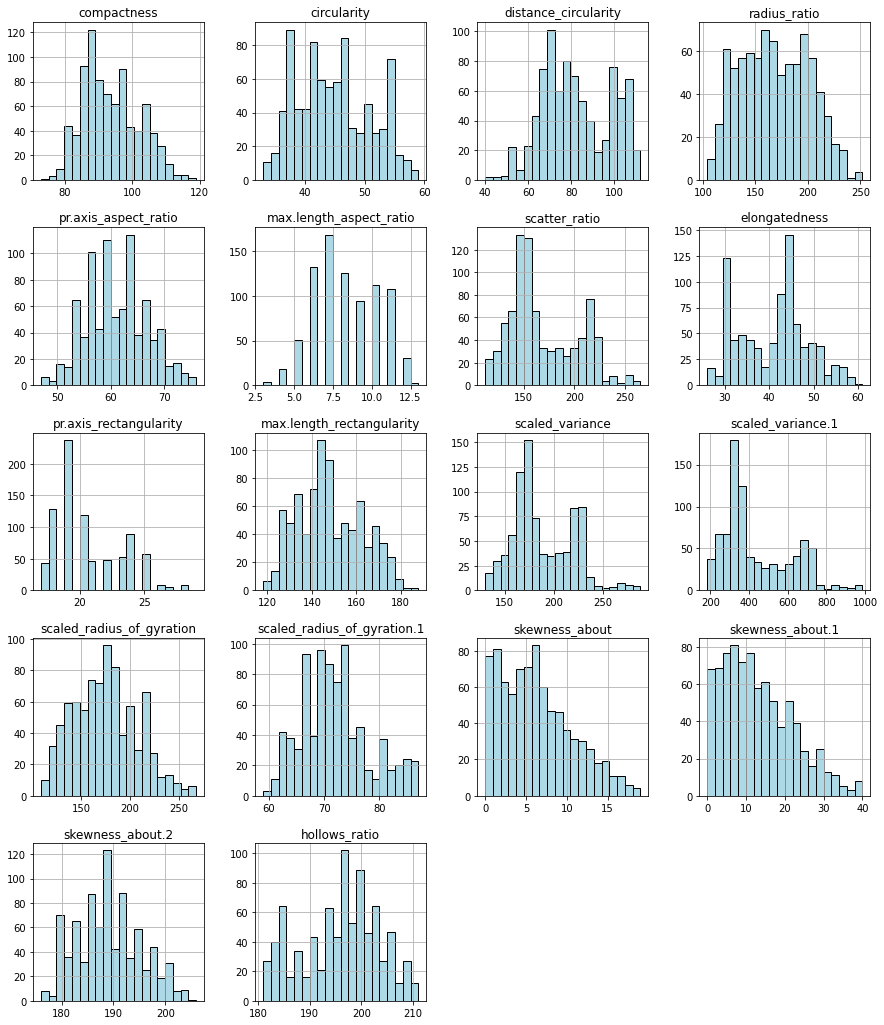

In [13]:
# Distribution of attributes
df.hist(bins=20, figsize=(15,18), color='lightblue', edgecolor = 'black')
plt.show()

#### Observations:
- Most attributes are normally distributed
- skewness_about, skewness_about.1 are right skewed

car    429
bus    218
van    199
Name: class, dtype: int64


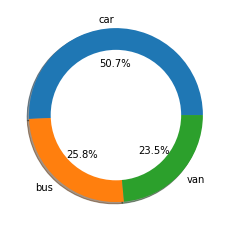

In [14]:
print(df['class'].value_counts())
plt.pie(df['class'].value_counts(),labels=df['class'].value_counts().index,autopct='%1.1f%%',shadow=True)
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

It can be seen that there is slight imbalance in dataset as car is the majority class which is around 50%. So there can be a higher chance that model can predict the unseen data as "car class".

#### Skewness of features:

In [15]:
df.skew()

<ipython-input-15-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.118680
pr.axis_aspect_ratio           0.161223
max.length_aspect_ratio        0.090367
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.602557
scaled_variance.1              0.820685
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    0.535057
skewness_about                 0.624590
skewness_about.1               0.674715
skewness_about.2               0.249985
hollows_ratio                 -0.226341
dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

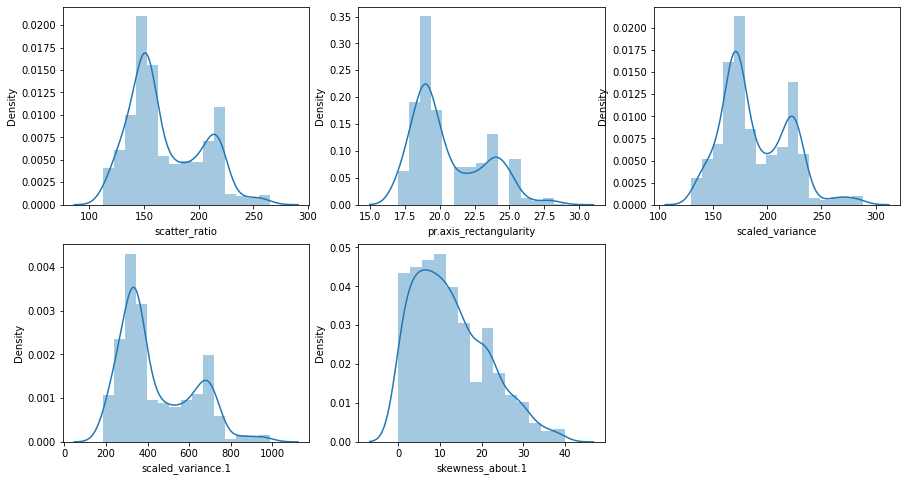

In [16]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(df['scatter_ratio'])
plt.subplot(2,3,2)
sns.distplot(df['pr.axis_rectangularity'])
plt.subplot(2,3,3)
sns.distplot(df['scaled_variance'])
plt.subplot(2,3,4)
sns.distplot(df['scaled_variance.1'])
plt.subplot(2,3,5)
sns.distplot(df['skewness_about.1'])

In [17]:
# Converting Categorical variables to Continuous
df['class'].replace(['bus','car','van'],[0,1,2],inplace=True)

#### Multivariate Analysis

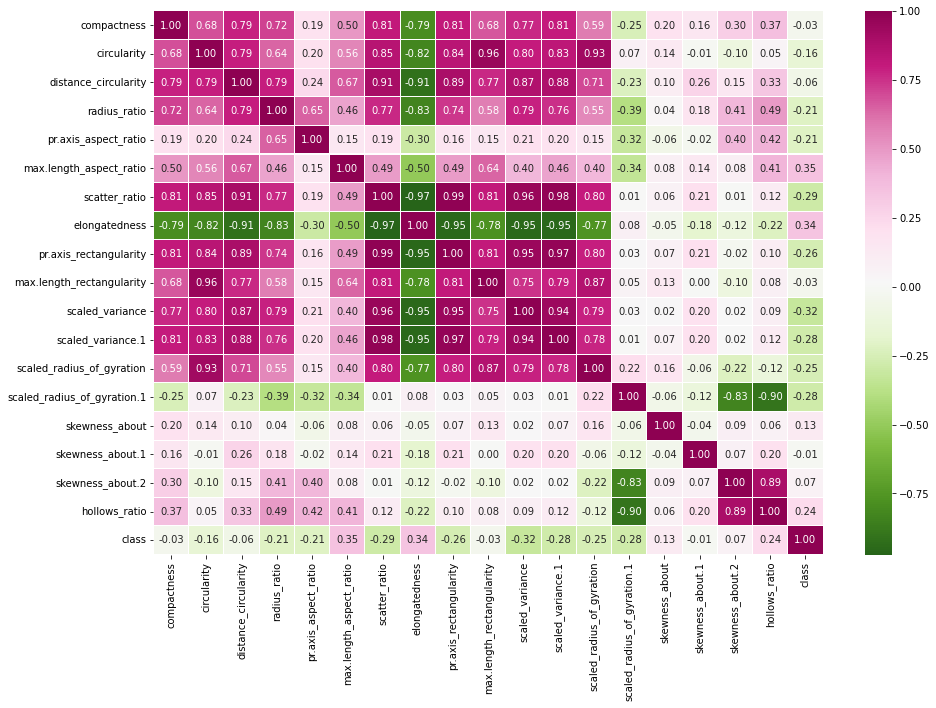

In [18]:
# HeatMap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),fmt='.2f',annot=True,linewidths=0.01,cmap='PiYG_r')

#### Observations:

It can be seen that certain attributes are highly correlated. So, some high correlated attributes can be dropped.

- scatter_ratio & pr.axis_rectangularity - 0.99
- scatter_ratio & scaled_variance.1 - 0.98
- scatter_ratio & elongatedness - 0.97 (negative)
- cirularity & max.length_rectangularity - 0.96
- pr.axis_rectangularity & elongatedness - 0.95 (negative)
- scaled_variance & scaled_variance.1 - 0.94

pr.axis_aspect_ratio, max_length_aspect_ratio, skewness_about & skewness_about.1 do not have any correlation with other columns.

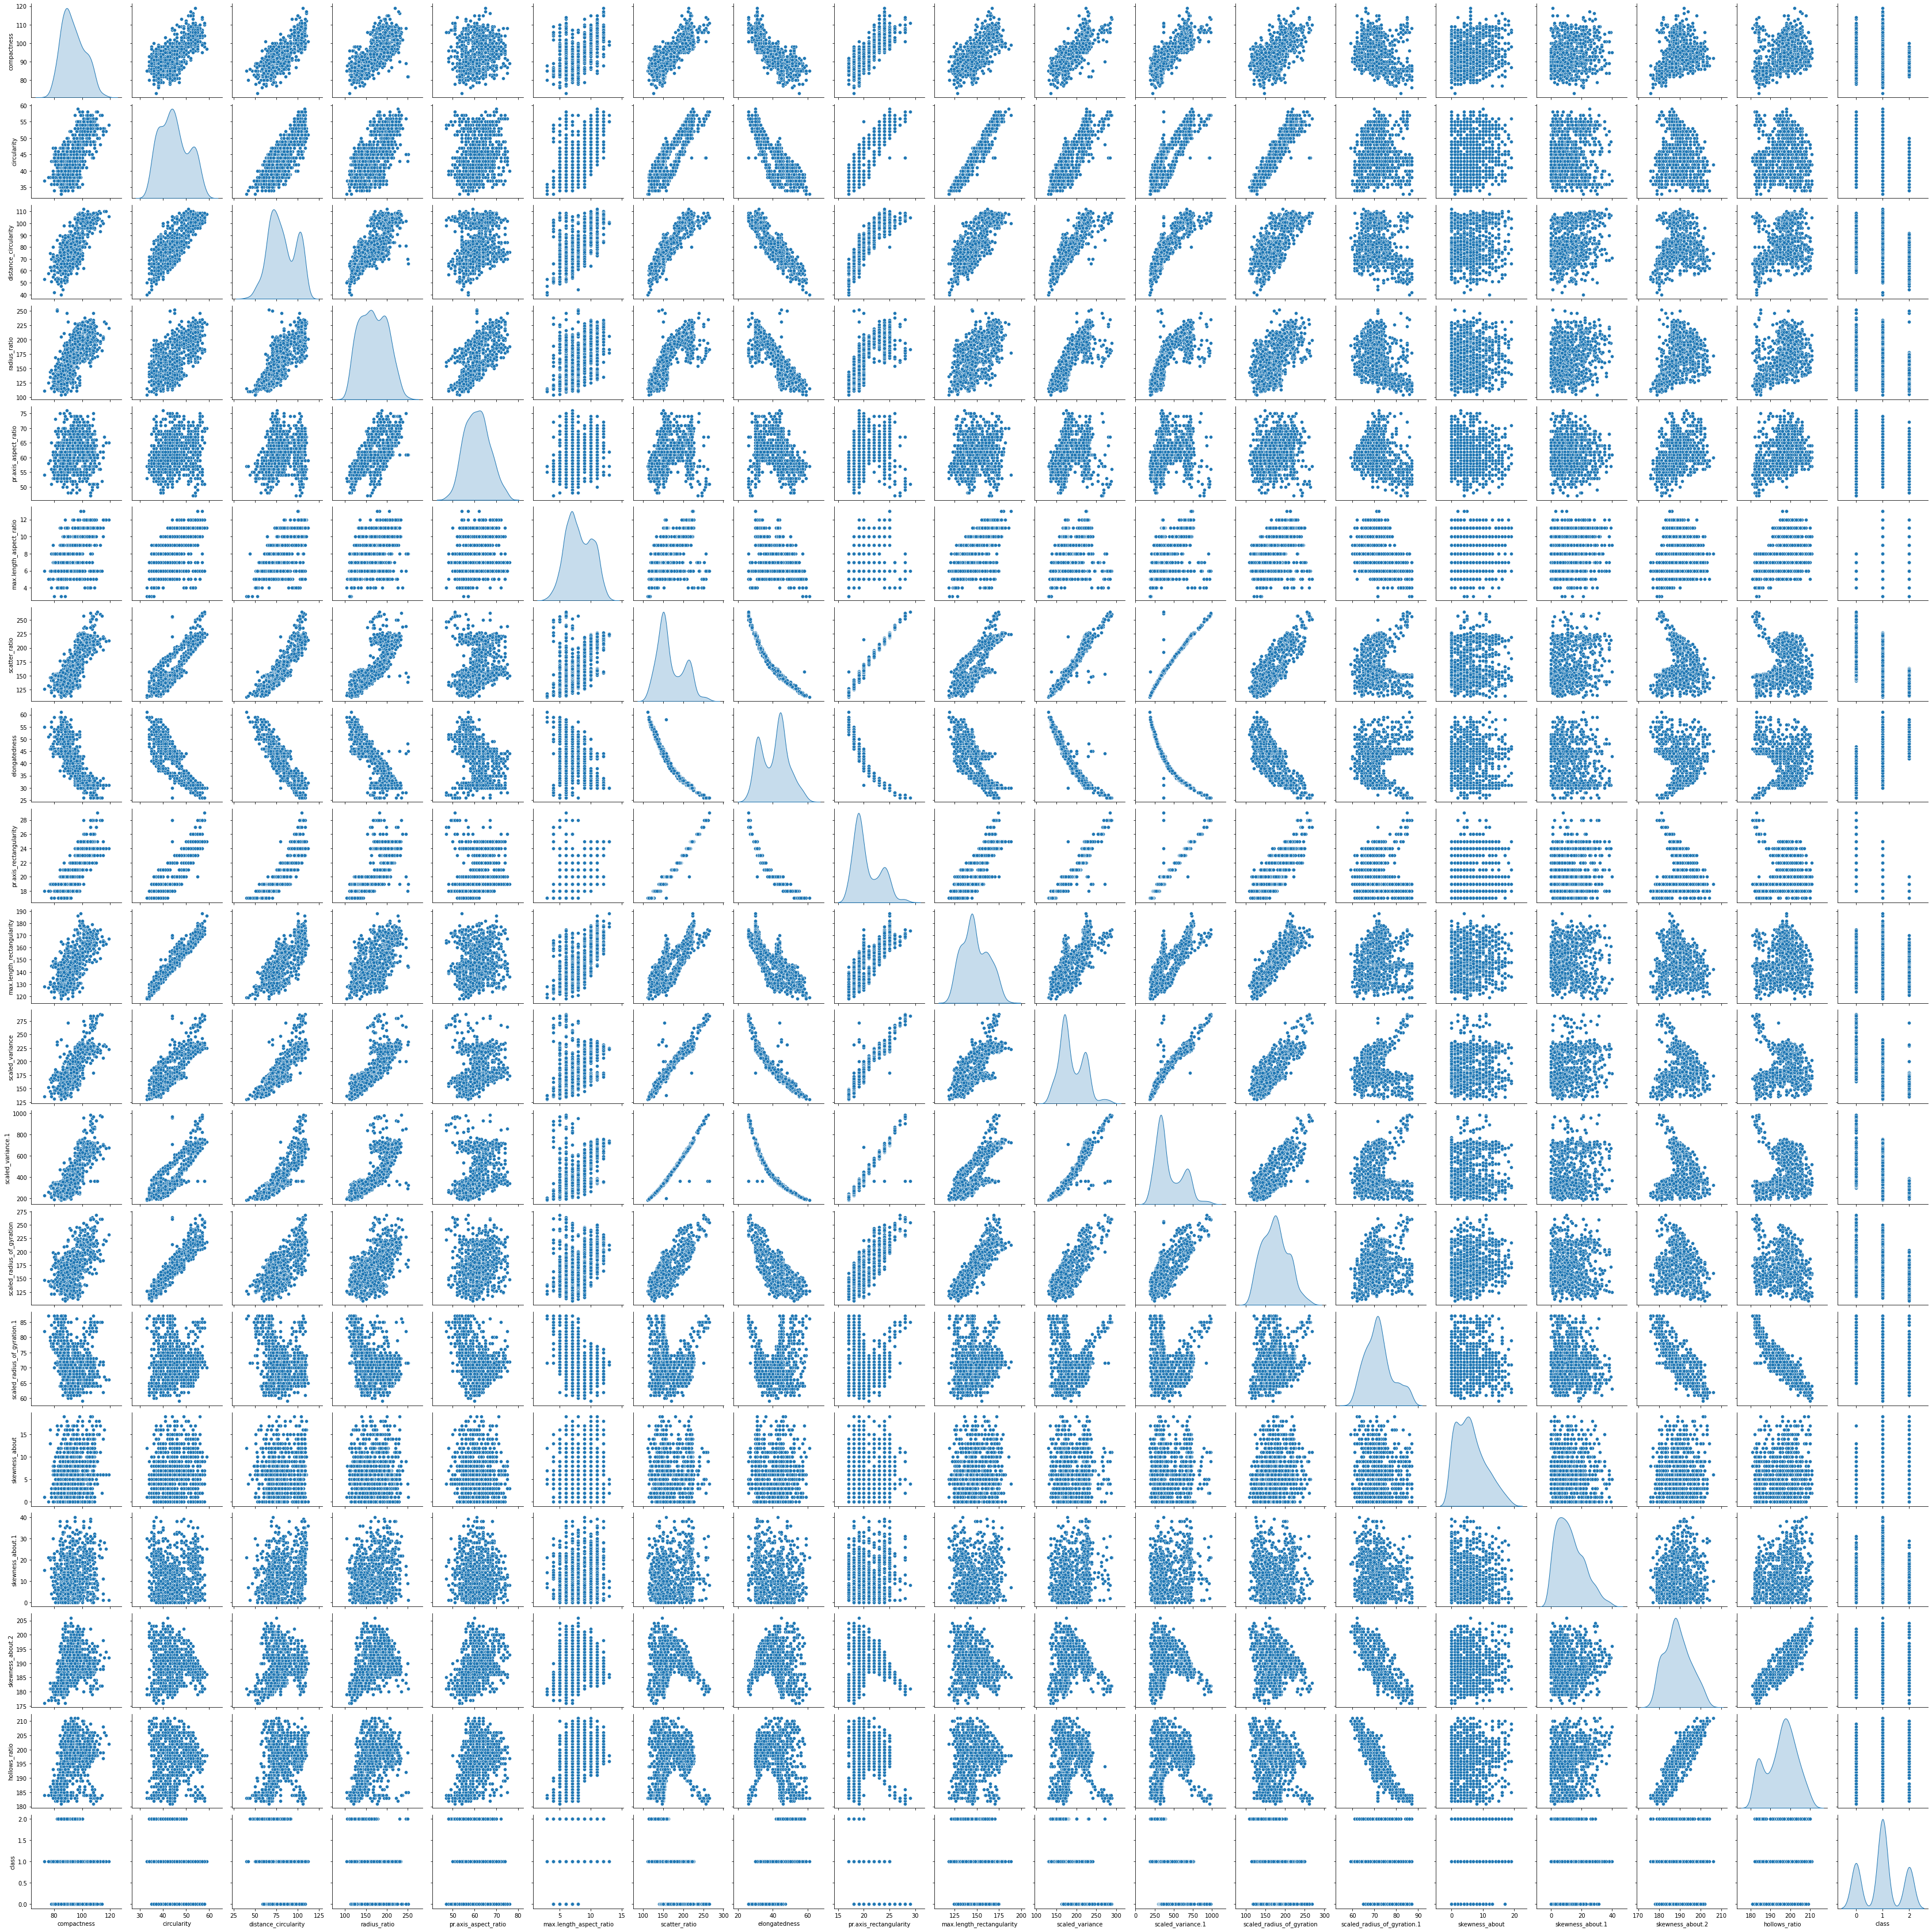

In [19]:
# Pair plot
sns.pairplot(df,diag_kind='kde')

#### Observations:

compactness
- positive linear relationship with circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity,....

elongatedness
- has negative linearity with compactness, circularity, distance_circularity, radius_ratio

In [20]:
# Seperating features and target
Xi = df.drop('class',axis=1)
y = df['class']

#### Data Standardisation

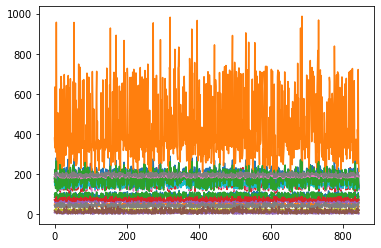

In [21]:
# Checking Scaling
plt.plot(Xi)
plt.show()

Here dimensions in dataset are unknown, it is good to scale the data before doing classification.

In [22]:
X = Xi.apply(zscore)

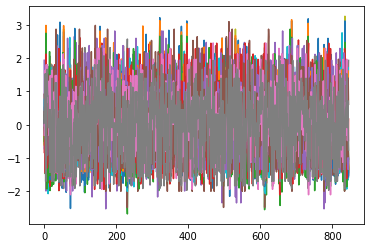

In [23]:
# Post Scaling
plt.plot(X)
plt.show()

#### Splitting Data into training and test set in the ratio 70:30

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

#### Naive Bayes' Classifier

In [25]:
model_gnb = GaussianNB()
model_gnb.fit(X_train,y_train)

GaussianNB()

In [26]:
model_gnb.score(X_test,y_test)

0.6220472440944882

In [27]:
np.mean(cross_val_score(model_gnb,X,y,cv=10))

0.6277170868347339

In [28]:
gnb_pred = model_gnb.predict(X_test)

Accuracy :  0.6220472440944882
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.27      0.41        60
           1       0.90      0.65      0.76       136
           2       0.39      0.91      0.54        58

    accuracy                           0.62       254
   macro avg       0.72      0.61      0.57       254
weighted avg       0.78      0.62      0.63       254



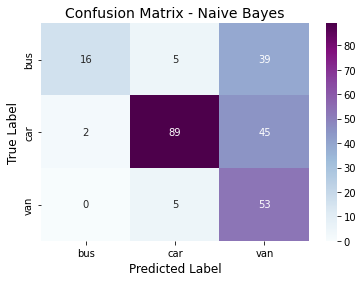

In [29]:
cm_gnb = confusion_matrix(y_test,gnb_pred)
class_label = ["bus", "car", "van"]
df_gnb = pd.DataFrame(cm_gnb,index = class_label, columns = class_label)
sns.heatmap(df_gnb, annot = True, fmt = "d",cmap="BuPu")
plt.title("Confusion Matrix - Naive Bayes",fontsize=14)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(y_test, gnb_pred))
print("Classification Report: \n",classification_report(y_test, gnb_pred))

#### Observations:
- Out of 60 actual instances of buses, model classifies 16 bus correctly. 5 buses wrongly classified as cars & other 39 buses are classified as vans.
- Out of 136 actual cars, model has correctly predicted 89 cars. 2 cars wrongly classified as buses and other 45 cars are wrongly classified as vans.
- Out of 58 actual instances of vans, model classifies 53 vans correctly. 5 vans are wrongly classified as cars.

#### Support Vector Classifier (SVC)

In [30]:
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)

SVC()

In [31]:
model_svc.score(X_test,y_test)

0.9724409448818898

In [32]:
np.mean(cross_val_score(SVC(gamma='scale'),X,y,cv=10))

0.9574229691876749

In [33]:
svc_pred = model_svc.predict(X_test)

Accuracy :  0.9724409448818898
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.97      0.99      0.98       136
           2       0.96      0.95      0.96        58

    accuracy                           0.97       254
   macro avg       0.97      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



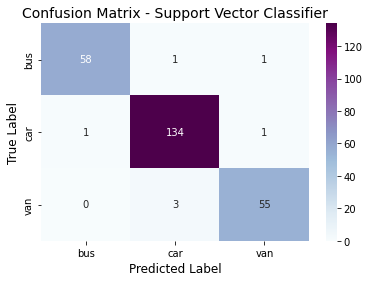

In [34]:
cm_svc = confusion_matrix(y_test,svc_pred)
class_label = ["bus", "car", "van"]
df_svc = pd.DataFrame(cm_svc,index = class_label, columns = class_label)
sns.heatmap(df_svc, annot = True, fmt = "d",cmap="BuPu")
plt.title("Confusion Matrix - Support Vector Classifier",fontsize=14)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(y_test, svc_pred))
print("Classification Report: \n",classification_report(y_test, svc_pred))

#### Observations:
- Out of 60 actual instances of buses, model classifies 58 bus correctly. 1 bus wrongly classified as car & other bus is classified as van.
- Out of 136 actual cars, model has correctly predicted 134 cars. 1 car wrongly classified as bus and other car is wrongly classified as van.
- Out of 58 actual instances of vans, model classifies 55 vans correctly. 3 vans are wrongly classified as car.

In [35]:
model = pd.DataFrame({'Accuracy (using test set)':[model_gnb.score(X_test,y_test),model_svc.score(X_test,y_test)],'Accuracy (cross-validation)':[np.mean(cross_val_score(model_gnb,X,y,cv=10)),np.mean(cross_val_score(SVC(gamma='scale'),X,y,cv=10))]},index=['Naive Bayes','Support Vector Classifier'])
model

Accuracy (using test set)  \
Naive Bayes                                 0.622047   
Support Vector Classifier                   0.972441   

                           Accuracy (cross-validation)  
Naive Bayes                                   0.627717  
Support Vector Classifier                     0.957423

Without dimensionality reducation, it can be seen that SVC performs better with an accuracy of 97.24% on test set.

### Dimensionality reduction using Principal Component Analysis (PCA) 

In [36]:
pca = PCA()
pca.fit(X)

PCA()

In [37]:
pca.explained_variance_

array([9.74940269e+00, 3.35071912e+00, 1.19238155e+00, 1.13381916e+00,
       8.83997312e-01, 6.66265745e-01, 3.18150910e-01, 2.28179142e-01,
       1.31018595e-01, 7.98619108e-02, 7.33979478e-02, 6.46162669e-02,
       4.01448646e-02, 3.22758478e-02, 2.93936408e-02, 2.27005257e-02,
       1.98136761e-02, 5.16287320e-03])

Cumulative Variance Explained [ 54.0993254   72.69242795  79.30893968  85.60048941  90.50578051
  94.2028816   95.96829741  97.23446089  97.96148159  98.40463444
  98.81191882  99.17047375  99.39323715  99.57233547  99.73544045
  99.86140541  99.97135127 100.        ]


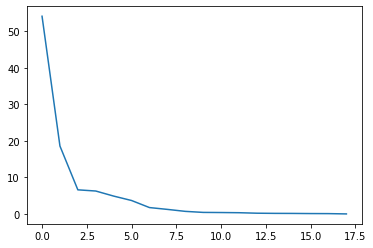

In [38]:
# Finding variance and cumulative variance by each eigen vector
eigen_total = sum(pca.explained_variance_)
var_exp = [( i /eigen_total ) * 100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
plt.plot(var_exp)

It can be seen that as no: of Principal Components increase, there is drop in variance explained.

In [39]:
cum_var_exp

array([ 54.0993254 ,  72.69242795,  79.30893968,  85.60048941,
        90.50578051,  94.2028816 ,  95.96829741,  97.23446089,
        97.96148159,  98.40463444,  98.81191882,  99.17047375,
        99.39323715,  99.57233547,  99.73544045,  99.86140541,
        99.97135127, 100.        ])

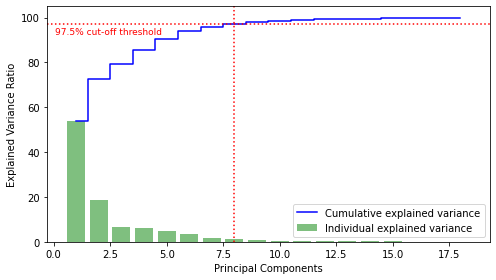

In [40]:
# Ploting 
plt.figure(figsize=(7 , 4))
plt.bar(range(1,19), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance',color='green')
plt.step(range(1,19), cum_var_exp, where='mid', label = 'Cumulative explained variance',color='blue')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.axhline(y=97.23, color='r', linestyle='dotted')
plt.text(0.05, 92.5, '97.5% cut-off threshold', color = 'red', fontsize=9)
plt.axvline(x=8, color='r', linestyle='dotted')
plt.show()

First 8 Principal Components contribute about 97.23% variance. So <strong>"n_components"</strong> can be taken as <strong>8</strong>.

In [41]:
pca8 = PCA(n_components=8)
X_reduced = pca8.fit_transform(X)
X_reduced.T

array([[ 0.58422804, -1.5121798 ,  3.91344816, ...,  5.12009307,
        -3.29709502, -4.96759448],
       [-0.67567325, -0.34893367,  0.2345073 , ..., -0.18227007,
        -1.10194286,  0.42274968],
       [-0.45333356, -0.33343619, -1.26509352, ..., -0.50836783,
         1.93384417,  1.30871531],
       ...,
       [-1.84880885, -0.11831711, -0.68559401, ...,  0.17264281,
         0.02003876,  0.38469257],
       [-0.18041487,  0.20330786,  0.81158817, ...,  0.88474898,
        -0.26057897, -0.39384302],
       [-0.68196902,  0.10442512,  0.17305277, ..., -0.38820845,
         0.45880709, -0.21433678]])

#### Splitting Data into training and test set in the ratio 70:30

In [42]:
Xpca_train,Xpca_test,ypca_train,ypca_test = train_test_split(X_reduced,y,test_size=0.3,random_state=23)

#### Naive Bayes' with PCA

In [43]:
model_gnb_pca = GaussianNB()
model_gnb_pca.fit(Xpca_train,ypca_train)

GaussianNB()

In [44]:
model_gnb_pca.score(Xpca_test,ypca_test)

0.8070866141732284

In [45]:
np.mean(cross_val_score(GaussianNB(),X_reduced,y,cv=10))

0.8275070028011206

In [46]:
gnb_pca_pred = model_gnb_pca.predict(Xpca_test)

Accuracy :  0.8070866141732284
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.67      0.70        60
           1       0.88      0.88      0.88       136
           2       0.71      0.78      0.74        58

    accuracy                           0.81       254
   macro avg       0.78      0.77      0.77       254
weighted avg       0.81      0.81      0.81       254



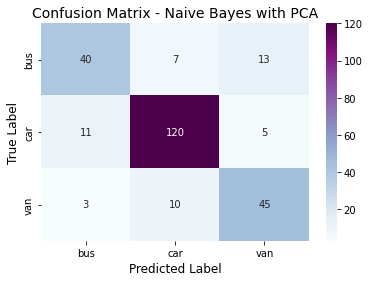

In [47]:
cm_gnb_pca = confusion_matrix(ypca_test,gnb_pca_pred)
class_label = ["bus", "car", "van"]
df_gnb_pca = pd.DataFrame(cm_gnb_pca,index = class_label, columns = class_label)
sns.heatmap(df_gnb_pca, annot = True, fmt = "d",cmap="BuPu")
plt.title("Confusion Matrix - Naive Bayes with PCA",fontsize=14)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(ypca_test, gnb_pca_pred))
print("Classification Report: \n",classification_report(ypca_test, gnb_pca_pred))

#### Observations:
- Out of 60 actual instances of buses, model classifies 40 bus correctly. 7 buses wrongly classified as cars & other 13 buses are classified as vans.
- Out of 136 actual cars, model has correctly predicted 120 cars. 11 cars wrongly classified as buses and other 5 cars are wrongly classified as vans.
- Out of 58 actual instances of vans, model classifies 45 vans correctly. 3 vans wrongly classified as buses & other 10 vans are classified as cars.

#### SVC with PCA

In [48]:
model_svc_pca = SVC(C=0.1,gamma='scale')
model_svc_pca.fit(Xpca_train,ypca_train)

SVC(C=0.1)

In [49]:
model_svc_pca.score(Xpca_test,ypca_test)

0.8937007874015748

#### Finding out the best Hyperparameters using grid search

In [51]:
# Using grid search with (C=0.01,0.05,0.5,1 & kernel = linear,rbf) to find the optimal hyperparameters

grid_param = {'C':[0.01,0.05,0.5,1],'kernel':['linear','rbf']}
model = GridSearchCV(SVC(gamma='scale'),param_grid=grid_param,cv=10)
model.fit(Xpca_train,ypca_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']})

In [52]:
print("Optimal Hyperparameter: ",model.best_params_)

Optimal Hyperparameter:  {'C': 1, 'kernel': 'rbf'}


#### Putting optimal hyperparameters in the model

In [53]:
# using grid search optimal parameters {'C': 1, 'kernel': 'rbf'}
model_svc_grid = SVC(C=1,kernel='rbf',gamma='scale')
model_svc_grid.fit(Xpca_train,ypca_train)

SVC(C=1)

In [54]:
model_svc_grid.score(Xpca_test,ypca_test)

0.9763779527559056

#### Cross validation

In [55]:
cross_val = cross_val_score(SVC(C=1,kernel='rbf',gamma='scale'),X_reduced,y,cv=10)
cross_val

array([0.92941176, 0.96470588, 0.94117647, 0.95294118, 0.95294118,
       0.95294118, 0.89285714, 0.95238095, 0.95238095, 0.95238095])

In [56]:
np.mean(cross_val)

0.9444117647058823

In [57]:
svc_grid_pred = model_svc_grid.predict(Xpca_test)

Accuracy :  0.9763779527559056
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.97      0.99      0.98       136
           2       0.98      0.93      0.96        58

    accuracy                           0.98       254
   macro avg       0.98      0.97      0.98       254
weighted avg       0.98      0.98      0.98       254



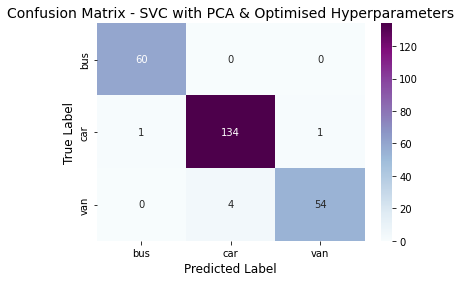

In [58]:
cm_svc_grid = confusion_matrix(ypca_test,svc_grid_pred)
class_label = ["bus", "car", "van"]
df_svc_grid = pd.DataFrame(cm_svc_grid,index = class_label, columns = class_label)
sns.heatmap(df_svc_grid, annot = True, fmt = "d",cmap="BuPu")
plt.title("Confusion Matrix - SVC with PCA & Optimised Hyperparameters",fontsize=14)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(ypca_test, svc_grid_pred))
print("Classification Report: \n",classification_report(ypca_test, svc_grid_pred))

#### Observations:

- Out of 60 actual instances of buses, model predicts all the 60 buses correctly.
- Out of 136 actual cars, model has correctly predicted 134 cars. 1 car wrongly classified as bus and other car is wrongly classified as van.
- Out of 58 actual instances of vans, model classifies 54 vans correctly. 4 vans are wrongly classified as cars.

#### Model Comparison:

In [59]:
model_final = pd.DataFrame({'Accuracy test set':[model_gnb.score(X_test,y_test),model_gnb_pca.score(Xpca_test,ypca_test),model_svc.score(X_test,y_test),model_svc_grid.score(Xpca_test,ypca_test)],
                            'cross validation':[np.mean(cross_val_score(model_gnb,X,y,cv=10)),np.mean(cross_val_score(GaussianNB(),X_reduced,y,cv=10)),np.mean(cross_val_score(SVC(gamma='scale'),X,y,cv=10)),np.mean(cross_val_score(SVC(C=1,kernel='rbf',gamma='scale'),X_reduced,y,cv=10))],
                            },
                           index=['Naive Bayes','Naive Bayes with PCA','SVC','SVC with PCA'])
print('\n\033[1m'+'Model performance summary:')
print('=='*13)
model_final


Model performance summary:


Accuracy test set  cross validation
Naive Bayes                    0.622047          0.627717
Naive Bayes with PCA           0.807087          0.827507
SVC                            0.972441          0.957423
SVC with PCA                   0.976378          0.944412

#### Conclusion:

- Using Principal Component Analysis (PCA), able to reduce to <strong>8</strong> features from 18
- Support Vector Classifier performs better with PCA and grid search.
- With Optimised Hyper parameters (C = 1 & kernel = 'rbf'), <strong>Support Vector Classifier (SVC)</strong> achievs an accuracy of about <strong>97.63%</strong>
- Eventhough confusion matrix shows better results in SVC w/o PCA, model with dimensionality reduction from 18 components to 8 could achieve accuracy very nearer. 

From the analysis, it can be seen that <strong>Support Vector Classifier (SVC)</strong> is a better model to classify the given silhouette as a bus, car or van.